# Project: Wrangle and Analyze Data

# Introduction

Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.



# What Software Do I Need?

The entirety of this project can be completed inside the Udacity classroom on the Project Workspace: Complete and Submit Project page using the Jupyter Notebook provided there. (Note: This Project Workspace may not be available in all versions of this project, in which case you should follow the directions below.)

If you want to work outside of the Udacity classroom, the following software requirements apply:

You need to be able to work in a Jupyter Notebook on your computer. Please revisit our Jupyter Notebook and Anaconda tutorials earlier in the Nanodegree program for installation instructions.
The following packages (libraries) need to be installed. You can install these packages via conda or pip. Please revisit our Anaconda tutorial earlier in the Nanodegree program for package installation instructions.
pandas
NumPy
requests
tweepy
json
You need to be able to create written documents that contain images and you need to be able to export these documents as PDF files. This task can be done in a Jupyter Notebook, but you might prefer to use a word processor like Google Docs, which is free, or Microsoft Word.
A text editor, like Sublime, which is free, will be useful but is not required.

# Project Motivation

Context

Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

The Data

Enhanced Twitter Archive
The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356). Extracted data from tweet text

I extracted this data programmatically, but I didn't do a very good job. The ratings probably aren't all correct. Same goes for the dog names and probably dog stages (see below for more information on these) too. You'll need to assess and clean these columns if you want to use them for analysis and visualization.

Additional Data via the Twitter API

Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But you, because you have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. And guess what? You're going to query Twitter's API to gather this valuable data.

Image Predictions File

One more cool thing: I ran every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

Key Points

Key points to keep in mind when data wrangling for this project:

You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
Cleaning includes merging individual pieces of data according to the rules of tidy data.
The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

Project Details
Your tasks in this project are as follows:

Data wrangling, which consists of:
Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
Assessing data
Cleaning data
Storing, analyzing, and visualizing your wrangled data
Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

In [1]:
!pip install jupyterthemes==0.16.1

    100% |████████████████████████████████| 6.0MB 5.4MB/s eta 0:00:01    31% |██████████▎                     | 1.9MB 14.3MB/s eta 0:00:01    78% |█████████████████████████▏      | 4.7MB 21.0MB/s eta 0:00:01
    100% |████████████████████████████████| 51kB 6.3MB/s eta 0:00:01
    100% |████████████████████████████████| 122kB 10.4MB/s ta 0:00:01   34% |███████████                     | 40kB 12.4MB/s eta 0:00:01
    100% |████████████████████████████████| 51kB 12.2MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 13.1MB/s ta 0:00:01
    100% |████████████████████████████████| 358kB 9.6MB/s eta 0:00:01    86% |███████████████████████████▋    | 307kB 19.0MB/s eta 0:00:01
    100% |████████████████████████████████| 2.2MB 10.3MB/s ta 0:00:01    36% |███████████▊                    | 798kB 21.4MB/s eta 0:00:01


ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.8 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.15
    Uninstalling prompt-toolkit-1.0.15:
      Successfully uninstalled prompt-toolkit-1.0.15
  Found existing installation: widgetsnbextension 3.1.0
    Uninstalling widgetsnbextension-3.1.0:
      Successfully uninstalled widgetsnbextension-3.1.0


In [2]:
# Import statements
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
from IPython.display import Image
from functools import reduce
import re
import seaborn as sns
import datetime
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
% matplotlib inline


# Gather

In [4]:
# Open the csv file
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Tweet image prediction

In [5]:
# Download the image prediction file using the link provided to Udacity students
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [6]:
# Showing the data in the image predictions file
df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Ref: https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

In [7]:
auth = tweepy.OAuthHandler('5Uur0mo4ol2kB8yhtZ1VxXS0u', 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH')
auth.set_access_token('303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB', 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

Twitter API & JSON

In [8]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in df_twitter_archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 739
Rate limit reached. Sleeping for: 737


In [9]:
#Printing 
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets no found" , len(cant_find_tweets_for_those_ids))

The list of tweets 2331
The list of tweets no found 25


In [10]:
#Then in this code block we isolate the json part of each tweepy 
#status object that we have downloaded and we add them all into a list
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [11]:
#we write this list into a txt file:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [12]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [13]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
friends_count       2331 non-null int64
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


# Assessing data

Visual assessment) Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes

In [14]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [16]:
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35391,7477,8894131,18,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30638,5549,8894131,18,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23035,3671,8894131,18,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38699,7652,8894131,18,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36968,8250,8894131,18,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,18632,2760,8894131,18,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,10830,1791,8894131,18,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,59640,16729,8894131,18,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,25648,3815,8894131,18,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,29265,6492,8894131,18,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


(Programmatic assessment) Pandas' functions and/or methods are used to assess the data.

In [17]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
friends_count       2331 non-null int64
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


Archive Dataframe Analysis

In [20]:
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
print(df_twitter_archive.loc[df_twitter_archive.rating_numerator == 204, 'text']) 
print(df_twitter_archive.loc[df_twitter_archive.rating_numerator == 143, 'text']) 
print(df_twitter_archive.loc[df_twitter_archive.rating_numerator == 666, 'text']) 
print(df_twitter_archive.loc[df_twitter_archive.rating_numerator == 1176, 'text'])
print(df_twitter_archive.loc[df_twitter_archive.rating_numerator == 144, 'text'])

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
Series([], Name: text, dtype: object)
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object


In [22]:
#print whole text in order to verify numerators and denominators
#17 dogs
print(df_twitter_archive['text'][1120]) 
#13 dogs
print(df_twitter_archive['text'][1634])
#just a tweet to explain actual ratings, this will be ignored when cleaning data
print(df_twitter_archive['text'][313]) 
#no picture, this will be ignored when cleaning data
print(df_twitter_archive['text'][189]) 
#12 dogs
print(df_twitter_archive['text'][1779])

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq


In [23]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 11, 'text']) 
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 2, 'text']) 
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 16, 'text']) 
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 15, 'text'])
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 7, 'text'])

784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object


In [25]:
#retweet - it will be deleted when delete all retweets
print(df_twitter_archive['text'][784]) 
#actual rating 14/10 need to change manually
print(df_twitter_archive['text'][1068]) 
#actual rating 10/10 need to change manually
print(df_twitter_archive['text'][1662]) 
#actual rating 9/10 need to change manually
print(df_twitter_archive['text'][2335]) 
#tweet to explain rating
print(df_twitter_archive['text'][1663]) 
#no rating - delete
print(df_twitter_archive['text'][342]) 
#no rating - delete
print(df_twitter_archive['text'][516])

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
@docmisterio account started on 11/15/15
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


In [26]:
df_twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Penny          10
Tucker         10
Lola           10
Bo              9
Winston         9
Sadie           8
the             8
Toby            7
Daisy           7
an              7
Bailey          7
Buddy           7
Koda            6
Jax             6
Oscar           6
Stanley         6
Rusty           6
Milo            6
Scout           6
Leo             6
Bella           6
Dave            6
Jack            6
very            5
             ... 
Bode            1
Remy            1
Rhino           1
Cheesy          1
Nigel           1
Charleson       1
Rufio           1
Shiloh          1
Winifred        1
officially      1
Farfle          1
Jeb             1
Birf            1
Bayley          1
Dwight          1
Eugene          1
Trip            1
Damon           1
Rascal          1
Bauer           1
Holly           1
Antony          1
Kayla           1
Shelby          1
Reagan    

In [27]:
df_twitter_archive[df_twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [28]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Image Dataframe Analysis

In [29]:
df_image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2002,876838120628539392,https://pbs.twimg.com/media/DCsnnZsVwAEfkyi.jpg,1,bloodhound,0.575751,True,redbone,0.240970,True,Tibetan_mastiff,0.088935,True
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
636,681242418453299201,https://pbs.twimg.com/media/CXRCXesVAAArSXt.jpg,1,motor_scooter,0.255934,False,rifle,0.145202,False,assault_rifle,0.097000,False
1621,803276597545603072,https://pbs.twimg.com/media/CyXPzXRWgAAvd1j.jpg,1,Pembroke,0.457086,True,chow,0.307801,True,golden_retriever,0.049988,True
578,678755239630127104,https://pbs.twimg.com/media/CWtsSQAUkAAnWws.jpg,1,malamute,0.606654,True,Border_collie,0.193831,True,collie,0.048378,True


In [30]:
# This is an image for tweet_id 856282028240666624
Image(url = 'https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg')

In [31]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
df_image_predictions[df_image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [33]:
df_image_predictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
Maltese_dog                   18
Eskimo_dog                    18
Shetland_sheepdog             18
beagle                        18
teddy                         18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [34]:
df_image_predictions['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
toy_terrier                        20
Samoyed                            20
chow                               20
miniature_pinscher                 20
malinois                           20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [35]:
df_image_predictions['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

Twitter Counts Dataframe Analysis

In [36]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35391,7477,8894131,18,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30638,5549,8894131,18,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23035,3671,8894131,18,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38699,7652,8894131,18,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36968,8250,8894131,18,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [37]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
friends_count       2331 non-null int64
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [38]:
tweet_json.describe()

,favorite_count,retweet_count,followers_count,friends_count
count,2331.000000,2331.000000,2.331000e+03,2331.0
mean,7396.297297,2627.323037,8.894133e+06,18.0
std,11488.231730,4444.767098,2.734238e+00,0.0
min,0.000000,1.000000,8.894130e+06,18.0
25%,1285.000000,533.500000,8.894130e+06,18.0
50%,3208.000000,1228.000000,8.894134e+06,18.0
75%,9052.500000,3049.000000,8.894135e+06,18.0
max,152577.000000,75502.000000,8.894138e+06,18.0


# Clean

This section consists of the cleaning portion of the data wrangling process:

Define

Code

Test

In [40]:
# Make a copy of the tables before cleaning
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
tweet_json_clean = tweet_json.copy()

Define

1.Merge the clean versions of df_twitter_archive, df_image_predictions, and tweet_json dataframes Correct the dog types

2.Create one column for the various dog types: doggo, floofer, pupper, puppo Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

3.Delete retweets

4.Remove columns no longer needed

5.Change tweet_id from an integer to a string

6.Change the timestamp to correct datetime format

7.Correct naming issues

8.Standardize dog ratings

9.Creating a new dog_breed column using the image prediction data

Merge the clean versions of df_twitter_archive, df_image_predictions, and tweet_json dataframes Correct the dog types

Code

In [41]:
# Ref: https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes/44338256
dfs = pd.concat([df_twitter_archive_clean, df_image_predictions_clean, tweet_json_clean], join='outer', axis=1)

In [42]:
dfs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.061428,True,892420643555336193,35391.0,7477.0,8894131.0,18.0,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.072010,True,892177421306343426,30638.0,5549.0,8894131.0,18.0,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.116197,True,891815181378084864,23035.0,3671.0,8894131.0,18.0,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.222752,True,891689557279858688,38699.0,7652.0,8894131.0,18.0,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.154629,True,891327558926688256,36968.0,8250.0,8894131.0,18.0,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [43]:
dfs.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'tweet_id',
       'favorite_count', 'retweet_count', 'followers_count', 'friends_count',
       'source', 'retweeted_status', 'url'],
      dtype='object')

Test

In [44]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 37 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
tweet_id                      20

Code and Test: Create one column for the various dog types: doggo, floofer, pupper, puppo

In [45]:
# Extract the text from the columns into the new dog_type colunn
dfs['dog_type'] = dfs['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [46]:
dfs[['dog_type', 'doggo', 'floofer', 'pupper', 'puppo']].sample(5)

,dog_type,doggo,floofer,pupper,puppo
2162,NaN,None,None,None,None
1629,NaN,None,None,None,None
1858,NaN,None,None,None,None
608,pupper,None,None,pupper,None
750,NaN,None,None,None,None


In [47]:
dfs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p3_dog,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,True,892420643555336193,35391.0,7477.0,8894131.0,18.0,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,892177421306343426,30638.0,5549.0,8894131.0,18.0,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,891815181378084864,23035.0,3671.0,8894131.0,18.0,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,True,891689557279858688,38699.0,7652.0,8894131.0,18.0,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,891327558926688256,36968.0,8250.0,8894131.0,18.0,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3,NaN


In [48]:
dfs.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'tweet_id',
       'favorite_count', 'retweet_count', 'followers_count', 'friends_count',
       'source', 'retweeted_status', 'url', 'dog_type'],
      dtype='object')

In [49]:
dfs.dog_type.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_type, dtype: int64

Code and Test: Delete retweets

In [50]:
dfs = dfs[np.isnan(dfs.retweeted_status_id)]

In [51]:
#Verify no non-null entires are left
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 38 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
tweet_id                      1896 non

In [52]:
# Remove the following columns:
dfs = dfs.drop(['retweeted_status_id', \
                                  'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [53]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 35 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
tweet_id                 1896 non-null float64
jpg_url                  1896 non-null object
img_num                  1896 non-null float64
p1                       1896 non-null object
p1_conf                  1896 non-null float64
p1_dog               

Code and Test: Remove columns no longer needed

In [54]:
dfs.drop(['in_reply_to_status_id', 
                  'in_reply_to_user_id',
                  'source',
                  'img_num',
                  'friends_count',
                  'source',
                  'url',
                  'followers_count'], axis = 1, inplace=True)

In [55]:
# Ref: https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
dfs = dfs.loc[:,~dfs.columns.duplicated()]

In [56]:
dfs.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count',
       'retweeted_status', 'dog_type'],
      dtype='object')

In [57]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
jpg_url               1896 non-null object
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null object
p2                    1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-null object
p3                    1896 non-null object
p3_conf               1896 non-null float64
p3_dog                1896 non-nu

In [58]:
dfs.drop(['retweeted_status'], axis = 1, inplace=True)

In [59]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
jpg_url               1896 non-null object
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null object
p2                    1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-null object
p3                    1896 non-null object
p3_conf               1896 non-null float64
p3_dog                1896 non-nu

Code and Test: Change tweet_id from an integer to a string

In [60]:
dfs['tweet_id'] = dfs['tweet_id'].astype(str)

In [61]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
jpg_url               1896 non-null object
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null object
p2                    1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-null object
p3                    1896 non-null object
p3_conf               1896 non-null float64
p3_dog                1896 non-n

Code and Test: Timestamps to datetime format

In [62]:
#Remove the time zone from the 'timestamp' column
dfs['timestamp'] = dfs['timestamp'].str.slice(start=0, stop=-6)

In [63]:
# Change the 'timestamp' column to a datetime object
dfs['timestamp'] = pd.to_datetime(dfs['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [64]:
dfs.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,35391.0,7477.0,NaN


Code and Test: Correct naming issues

In [65]:
dfs.name = dfs.name.str.replace('^[a-z]+', 'None')

In [66]:
dfs['name'].value_counts()

None         784
Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Sadie          8
Winston        8
Lola           8
Toby           7
Daisy          7
Koda           6
Oscar          6
Bo             6
Bella          6
Stanley        6
Bailey         6
Jax            6
Milo           5
Buddy          5
Louis          5
Scout          5
Bentley        5
Leo            5
Chester        5
Rusty          5
Dave           5
Jack           4
Sammy          4
            ... 
Clybe          1
Lugan          1
Bluebert       1
Humphrey       1
Seamus         1
Rascal         1
Winifred       1
Damon          1
Enchilada      1
Barry          1
Tassy          1
Furzey         1
Stefan         1
Rinna          1
Crumpet        1
Storkson       1
Henry          1
Ferg           1
Tayzie         1
Trip           1
Kallie         1
Noah           1
Dotsy          1
Shiloh         1
Farfle         1
Jeb            1
Birf           1
Dwight        

In [67]:
dfs['name'].sample(10)

607      Cooper
2352       None
237       Daisy
57       Elliot
401      Wilson
1401       None
1123    Crystal
1556       Brad
1068       None
2339       None
Name: name, dtype: object

Code and Test: Standardize dog ratings

In [68]:
dfs['rating_numerator'] = dfs['rating_numerator'].astype(float)

In [69]:
dfs['rating_denominator'] = dfs['rating_denominator'].astype(float)

In [70]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
jpg_url               1896 non-null object
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null object
p2                    1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-null object
p3                    1896 non-null object
p3_conf               1896 non-null float64
p3_dog              

In [71]:
# For loop to gather all text, indices, and ratings for tweets that contain a decimal in the numerator of the rating
ratings_decimals_text = []
ratings_decimals_index = []
ratings_decimals = []

for i, text in dfs['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_decimals_text.append(text)
        ratings_decimals_index.append(i)
        ratings_decimals.append(re.search('\d+\.\d+', text).group())

# Print ratings with decimals        
ratings_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [72]:
# Print the indices of the ratings above (have decimal)
ratings_decimals_index

[45, 695, 763, 1689, 1712]

In [73]:
#Correctly converting the above decimal ratings to float
dfs.loc[ratings_decimals_index[0],'rating_numerator'] = float(ratings_decimals[0])
dfs.loc[ratings_decimals_index[1],'rating_numerator'] = float(ratings_decimals[1])
dfs.loc[ratings_decimals_index[2],'rating_numerator'] = float(ratings_decimals[2])
dfs.loc[ratings_decimals_index[3],'rating_numerator'] = float(ratings_decimals[3])

In [74]:
# Testing the indices 
dfs.loc[40]

tweet_id                                             884562892145688576
timestamp                                           2017-07-11 00:00:02
text                  This is Kevin. He's just so happy. 13/10 what ...
expanded_urls         https://twitter.com/dog_rates/status/884562892...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                              Kevin
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
jpg_url                 https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg
p1                                                      German_shepherd
p1_conf                                                        0

In [75]:
Image(url = 'https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg')

In [76]:
# Create a new column called rating, and calulate the value with new, standardized ratings
dfs['rating'] = dfs['rating_numerator'] / dfs['rating_denominator']

In [77]:
dfs.sample(10)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type,rating
1421,698195409219559425,2016-02-12 17:22:12,Meet Beau &amp; Wilbur. Wilbur stole Beau's be...,https://twitter.com/dog_rates/status/698195409...,9.0,10.0,Beau,None,None,None,...,Cardigan,0.260504,True,Shetland_sheepdog,0.063703,True,3807.0,1664.0,NaN,0.90
1526,690374419777196032,2016-01-22 03:24:22,This is Phred. He's an Albanian Flepperkush. T...,https://twitter.com/dog_rates/status/690374419...,11.0,10.0,Phred,None,None,None,...,golden_retriever,0.272734,True,jigsaw_puzzle,0.041476,False,3000.0,962.0,NaN,1.10
30,886267009285017600,2017-07-15 16:51:35,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12.0,10.0,None,None,None,None,...,papillon,0.148258,True,Chihuahua,0.142860,True,25692.0,5605.0,NaN,1.20
639,793256262322548741,2016-11-01 01:00:05,Oh h*ck look at this spookling right here. Fri...,https://twitter.com/dog_rates/status/793256262...,12.0,10.0,None,None,None,None,...,Shih-Tzu,0.113672,True,Pomeranian,0.096229,True,44971.0,22073.0,NaN,1.20
1123,730427201120833536,2016-05-11 15:59:50,This is Crystal. She's flawless. Really wants ...,https://twitter.com/dog_rates/status/730427201...,11.0,10.0,Crystal,None,None,None,...,Great_Dane,0.084766,True,Labrador_retriever,0.058909,True,6669.0,2349.0,NaN,1.10
1552,688916208532455424,2016-01-18 02:49:58,This pupper just wants to say hello. 11/10 wou...,https://twitter.com/dog_rates/status/688916208...,11.0,10.0,None,None,None,pupper,...,bluetick,0.160380,True,standard_poodle,0.125982,True,2008.0,530.0,pupper,1.10
1763,678446151570427904,2015-12-20 05:25:42,Touching scene here. Really stirs up the emoti...,https://twitter.com/dog_rates/status/678446151...,10.0,10.0,None,None,None,None,...,pug,0.096242,True,Boston_bull,0.000234,True,2360.0,1104.0,NaN,1.00
432,820749716845686786,2017-01-15 21:49:15,Meet Sunny. He can take down a polar bear in o...,https://twitter.com/dog_rates/status/820749716...,13.0,10.0,Sunny,None,None,None,...,Pembroke,0.368566,True,Chihuahua,0.003330,True,45002.0,18792.0,NaN,1.30
45,883482846933004288,2017-07-08 00:28:19,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10.0,Bella,None,None,None,...,slug,0.000055,False,acorn,0.000026,False,20853.0,3267.0,NaN,1.35
1020,746757706116112384,2016-06-25 17:31:25,This is Maddie. She gets some wicked air time....,https://vine.co/v/5BYq6hmrEI3,11.0,10.0,Maddie,None,None,None,...,sombrero,0.010682,False,cocker_spaniel,0.002713,True,4368.0,1345.0,NaN,1.10


In [78]:
dfs.loc[30]

tweet_id                                             886267009285017600
timestamp                                           2017-07-15 16:51:35
text                  @NonWhiteHat @MayhewMayhem omg hello tanner yo...
expanded_urls                                                       NaN
rating_numerator                                                     12
rating_denominator                                                   10
name                                                               None
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
jpg_url                 https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg
p1                                                          toy_terrier
p1_conf                                                         

In [79]:
dfs.rating.head()

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rating, dtype: float64

Clean and Test: Creating a new dog_breed column using the image prediction data

In [80]:
dfs['dog_breed'] = 'None'

for i, row in dfs.iterrows():

    if row.p1_dog:
        dfs.set_value(i, 'dog_breed', row.p1)
    elif row.p2_dog and row.rating_numerator >= 10:
        dfs.set_value(i, 'dog_breed', row.p2)
    elif row.p3_dog and row.rating_numerator >= 10:
        dfs.set_value(i, 'dog_breed', row.p3)
    else:
        dfs.set_value(i, 'dog_breed', 'None')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [81]:
dfs.dog_breed.value_counts()

None                          315
golden_retriever              160
Labrador_retriever             99
Chihuahua                      87
Pembroke                       83
pug                            62
toy_poodle                     48
chow                           47
Samoyed                        42
Pomeranian                     38
cocker_spaniel                 30
Chesapeake_Bay_retriever       30
malamute                       30
French_bulldog                 27
miniature_pinscher             25
Cardigan                       23
Staffordshire_bullterrier      21
German_shepherd                20
Eskimo_dog                     20
beagle                         19
Siberian_husky                 19
kuvasz                         18
Lakeland_terrier               16
Rottweiler                     16
basset                         16
Italian_greyhound              16
Maltese_dog                    16
Shih-Tzu                       16
Great_Pyrenees                 15
schipperke    

# Storing, Analyzing, and Visualizing Data

This section provides an analysis of the data set, and corresponding visualizations to draw valuable conclusions.

1.Visualizing the total number of tweets over time to see whether that number increases, or decreases, over time.

2.Visualizing the retweet counts, and favorite counts comparison over time.

3.Visualizing the most popular dog breed

4.Visualizing the most popular dog names

In [82]:
# Storing the new twitter_dogs df to a new csv file
dfs.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

Analyze and Visualize: Visualizing the total number of tweets over time to see whether that number increases, or decreases, over time.

In [83]:
dfs.timestamp = pd.to_datetime(dfs['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = dfs.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

tweet_id    2175
dtype: int64

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


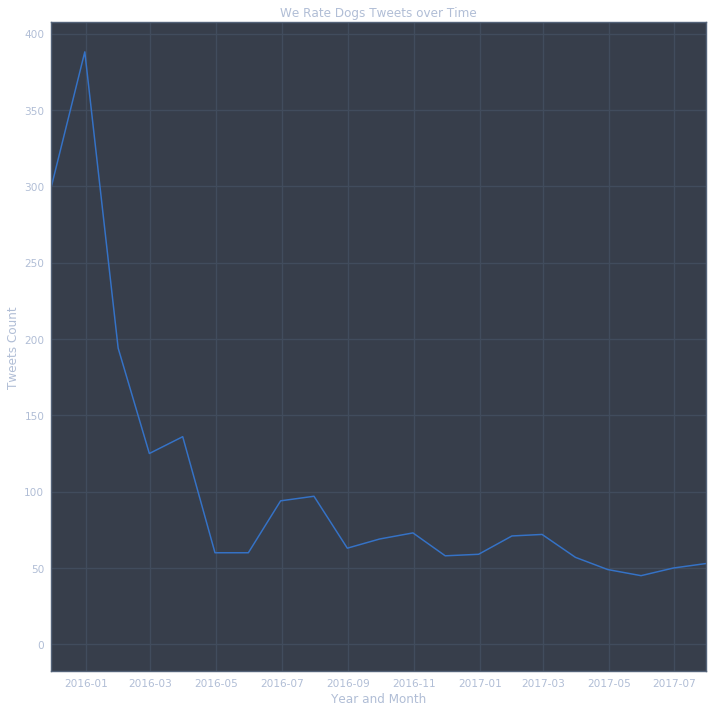

In [84]:
# Plotting time vs. tweets

plt.figure(figsize=(10, 10));
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]);

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id);
plt.title('We Rate Dogs Tweets over Time');

Over time tweets decreased sharply, with spikes in activity during the early of 2016(Jan), 2016(Mar), and generally decreasing from there.


Analyze and Visualize: Visualizing the retweet counts, and favorite counts comparison over time.

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


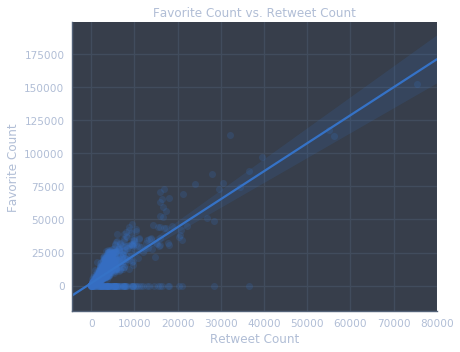

In [85]:
# Scatterplot of retweets vs favorite count

sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=dfs,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');

Favorite counts are correlated with retweet counts - this is a positive correlation.

Analyze and Visualize: Visualizing the most popular dog breed

In [86]:
dfs['dog_type'].value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_type, dtype: int64

The most popular dog breed is a golden retriever, with a labrador retriever coming in as the second most popular breed.

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


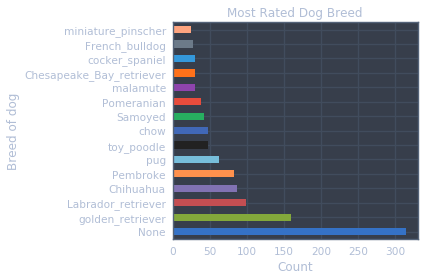

In [88]:
# Histogram to visualize dog breeeds
dog_breed = dfs.groupby('dog_breed').filter(lambda x: len(x) >= 25)

dog_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

Analyze and Visualize: Visualizing the most popular dog names

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


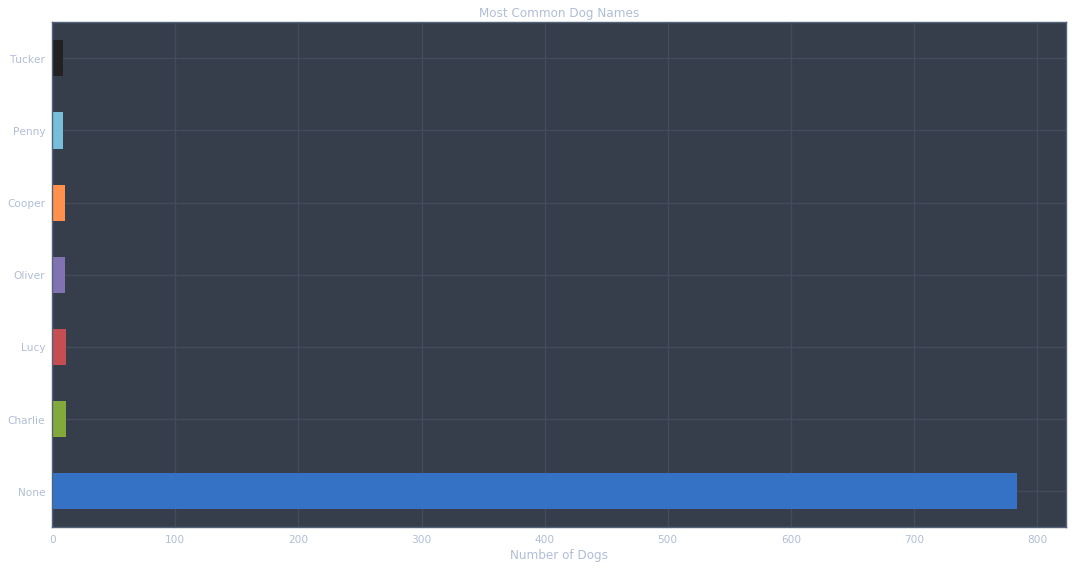

In [89]:
dfs.name.value_counts()[0:7].plot('barh', figsize=(15,8), title='Most Common Dog Names').set_xlabel("Number of Dogs");

In [90]:
dfs.name.value_counts()

None         784
Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Sadie          8
Winston        8
Lola           8
Toby           7
Daisy          7
Koda           6
Oscar          6
Bo             6
Bella          6
Stanley        6
Bailey         6
Jax            6
Milo           5
Buddy          5
Louis          5
Scout          5
Bentley        5
Leo            5
Chester        5
Rusty          5
Dave           5
Jack           4
Sammy          4
            ... 
Clybe          1
Lugan          1
Bluebert       1
Humphrey       1
Seamus         1
Rascal         1
Winifred       1
Damon          1
Enchilada      1
Barry          1
Tassy          1
Furzey         1
Stefan         1
Rinna          1
Crumpet        1
Storkson       1
Henry          1
Ferg           1
Tayzie         1
Trip           1
Kallie         1
Noah           1
Dotsy          1
Shiloh         1
Farfle         1
Jeb            1
Birf           1
Dwight        

The three most popular dog names are:

Lucy - 11

Charlie - 11

Oliver - 10 and so on